In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-10-02 12:03:10--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-10-02 12:03:10 (4.57 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
# Convert categorical columns into numeric
CATEGORICAL_COLUMNS = ['sex', 'smoker', 'region']

for column in CATEGORICAL_COLUMNS:
  dataset[column] = dataset[column].astype('category').cat.codes

In [ ]:
# Separate dataset into train and test data
train_dataset, test_dataset = np.split(dataset, [int(.8 * len(dataset))])

In [ ]:
# Pop 'expenses' column as label
train_labels, test_labels = train_dataset.pop('expenses'), test_dataset.pop('expenses')

In [ ]:
# Create normalized data layer
normalizer = layers.experimental.preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))

In [ ]:
normalizer

In [ ]:
# Create model
model = keras.Sequential([
                          normalizer,
                          layers.Dense(2),
                          layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),
              loss='mae',
              metrics=['mae', 'mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense (Dense)               (None, 2)                 14        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 30 (124.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


In [ ]:
# Train model
model.fit(train_dataset, train_labels, epochs=100, validation_split=0.2)

Epoch 1/100
27/27 [==============================] - 1s 12ms/step - loss: 13195.2939 - mae: 13195.2939 - mse: 320364672.0000 - val_loss: 13245.3740 - val_mae: 13245.3740 - val_mse: 313596032.0000
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 13152.5869 - mae: 13152.5869 - mse: 319138912.0000 - val_loss: 13174.6152 - val_mae: 13174.6152 - val_mse: 311635136.0000
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 13045.1250 - mae: 13045.1250 - mse: 316194688.0000 - val_loss: 13032.6387 - val_mae: 13032.6387 - val_mse: 307859296.0000
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 12859.8193 - mae: 12859.8193 - mse: 311298656.0000 - val_loss: 12814.2002 - val_mae: 12814.2002 - val_mse: 302070624.0000
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 12592.3496 - mae: 12592.3496 - mse: 304234528.0000 - val_loss: 12512.8379 - val_mae: 12512.8379 - val_mse: 293864128.0000
Epoch 6/100
27/27 [=====

9/9 - 0s - loss: 3471.8928 - mae: 3471.8928 - mse: 47921452.0000 - 155ms/epoch - 17ms/step
Testing set Mean Abs Error: 3471.89 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 7ms/step


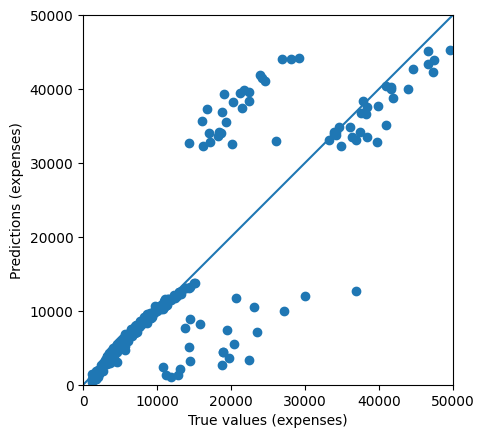

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
